In [5]:
%load_ext autoreload
%autoreload 2
import stereo as st
import numpy as np
import cv2 as cv
import PIL.Image

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## USB

In [23]:
kernel = np.ones((20, 20), dtype=np.uint8)

cameras = st.Cameras([0, 1], size=(1280, 1024), transformations=[
    (cv.cvtColor, cv.COLOR_BGR2GRAY),
    (cv.GaussianBlur, (21, 21), 100),
    # (cv.dilate, kernel)
])
calibration = st.Calibration2Cams()
calibration.load("calibrated/2cam-usb-12cm-v1.yaml")
stereo = st.StereoVision2Cams(calibration)

stream = st.NDepthStreamExt(cameras, stereo, True, True, True)

error: OpenCV(4.4.0) D:\Build\OpenCV\opencv-4.4.0\modules\imgproc\src\smooth.dispatch.cpp:297: error: (-215:Assertion failed) ksize.width > 0 && ksize.width % 2 == 1 && ksize.height > 0 && ksize.height % 2 == 1 in function 'cv::createGaussianKernels'


In [24]:
stream.start()

IntSlider(value=21, description='setBlockSize:\t', layout=Layout(width='500px'), max=99, min=5, step=2, style=…

IntSlider(value=4, description='setMinDisparity:\t', layout=Layout(width='500px'), max=256, min=-8, style=Slid…

IntSlider(value=128, description='setNumDisparities:\t', layout=Layout(width='500px'), max=256, min=16, step=1…

IntSlider(value=16, description='setSpeckleRange:\t', layout=Layout(width='500px'), max=256, min=-8, style=Sli…

IntSlider(value=45, description='setSpeckleWindowSize:\t', layout=Layout(width='500px'), max=512, min=-8, styl…

IntSlider(value=10, description='setTextureThreshold:\t', layout=Layout(width='500px'), max=512, style=SliderS…

IntSlider(value=31, description='setPreFilterCap:\t', layout=Layout(width='500px'), max=63, min=1, style=Slide…

IntSlider(value=9, description='setPreFilterSize:\t', layout=Layout(width='500px'), max=255, min=5, step=2, st…

Dropdown(description='setPreFilterType:\t', index=1, layout=Layout(width='500px'), options=(('PREFILTER_NORMAL…

IntSlider(value=0, description='setSmallerBlockSize:\t', layout=Layout(width='500px'), max=255, min=-1005, ste…

IntSlider(value=15, description='setUniquenessRatio:\t', layout=Layout(width='500px'), max=128, step=2, style=…

17.10.2020 01:15:31.888 stream INFO: Starting depth-map jupyter notebook stream.


Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x0...', width='720')

Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x0...', width='720')

Label(value='FPS:\t15.62\tAVG:\t15.81')

In [25]:
stream.stop()

{'setBlockSize': 21,
 'setMinDisparity': 4,
 'setNumDisparities': 128,
 'setSpeckleRange': 16,
 'setSpeckleWindowSize': 45,
 'setTextureThreshold': 10,
 'setPreFilterCap': 31,
 'setPreFilterSize': 9,
 'setPreFilterType': 1,
 'setSmallerBlockSize': 0,
 'setUniquenessRatio': 15}

17.10.2020 01:15:37.344 stream INFO: Closing jupyter notebook stream.


## CSI

In [2]:
cameras = st.Cameras(["test-videos/L.mp4", "test-videos/R.mp4"], transformations=[
    (cv.GaussianBlur, (7, 7), 100),
    (cv.cvtColor, cv.COLOR_BGR2GRAY),
])
calibration = st.Calibration2Cams()
calibration.load("calibrated/2cam-csi-12cm-v1.yaml")
stereo = st.StereoVision2Cams(calibration)

stream = st.NDepthStreamExt(cameras, stereo, True, True, True)

18.10.2020 17:12:33.383 calibration INFO: Loading important calibration parameters calibrated/2cam-csi-12cm-v1.yaml


D:\current\stereo\stereo\calibration.py:327: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  params = yaml.load(file)


In [3]:
stream.start()

IntSlider(value=21, description='setBlockSize:\t', layout=Layout(width='500px'), max=99, min=5, step=2, style=…

IntSlider(value=4, description='setMinDisparity:\t', layout=Layout(width='500px'), max=256, min=-8, style=Slid…

IntSlider(value=128, description='setNumDisparities:\t', layout=Layout(width='500px'), max=256, min=16, step=1…

IntSlider(value=16, description='setSpeckleRange:\t', layout=Layout(width='500px'), max=256, min=-8, style=Sli…

IntSlider(value=45, description='setSpeckleWindowSize:\t', layout=Layout(width='500px'), max=512, min=-8, styl…

IntSlider(value=10, description='setTextureThreshold:\t', layout=Layout(width='500px'), max=512, style=SliderS…

IntSlider(value=31, description='setPreFilterCap:\t', layout=Layout(width='500px'), max=63, min=1, style=Slide…

IntSlider(value=9, description='setPreFilterSize:\t', layout=Layout(width='500px'), max=255, min=5, step=2, st…

Dropdown(description='setPreFilterType:\t', index=1, layout=Layout(width='500px'), options=(('PREFILTER_NORMAL…

IntSlider(value=0, description='setSmallerBlockSize:\t', layout=Layout(width='500px'), max=255, min=-1005, ste…

IntSlider(value=15, description='setUniquenessRatio:\t', layout=Layout(width='500px'), max=128, step=2, style=…

18.10.2020 17:12:35.101 stream INFO: Starting depth-map jupyter notebook stream.


Image(value=b'', width='720')

Image(value=b'', width='720')

Label(value='')

In [4]:
stream.stop()

{'setBlockSize': 25,
 'setMinDisparity': 8,
 'setNumDisparities': 128,
 'setSpeckleRange': 16,
 'setSpeckleWindowSize': 45,
 'setTextureThreshold': 10,
 'setPreFilterCap': 31,
 'setPreFilterSize': 9,
 'setPreFilterType': 1,
 'setSmallerBlockSize': 0,
 'setUniquenessRatio': 15}

18.10.2020 17:13:02.522 stream INFO: Closing jupyter notebook stream.


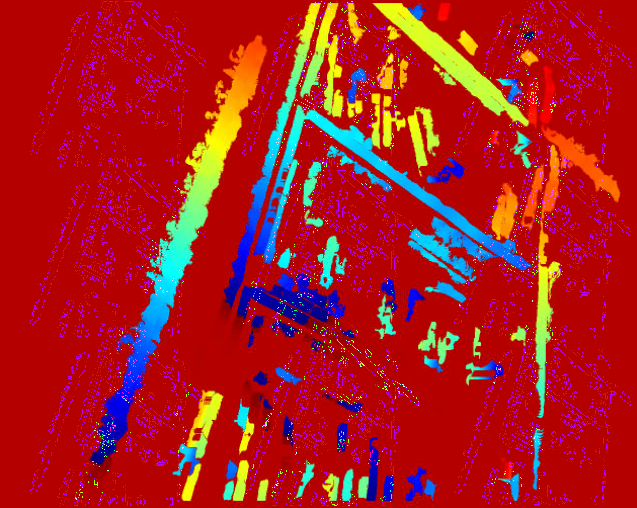

In [27]:
img = cv.imread("miscellaneous/examples/v1-usb.png")
canny = cv.Canny(img, 320, 150, L2gradient=0)
import PIL.Image
x = img + np.array([canny, canny, canny]).reshape((508, 637, 3))
PIL.Image.fromarray(x)